Q1. (Based on Step-by-Step Implementation of Ridge Regression using  Gradient  
Descent Optimization)  
Generate a dataset with atleast seven highly correlated columns and a target variable.
Implement Ridge Regression using Gradient Descent Optimization. Take different
values of learning rate (such as 0.0001,0.001,0.01,0.1,1,10) and regularization
parameter (10-15,10-10,10-5,10- 3,0,1,10,20). Choose the best parameters for which ridge
regression cost function is minimum and R2_score is maximum.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

generating synthetic dataset with 7 highly correlated features

In [ ]:
np.random.seed(42) #to get same randomness every time
n_samples=100
z=np.random.randn(n_samples) #randn gives generated nos that follow normal distribution
#print(z)

In [ ]:
X=np.zeros((n_samples, 7))
for i in range(7):
  noise= np.random.randn(n_samples)*0.05
  X[:,i]=(1+0.1*np.random.randn())*z+noise  #this gives us the correlated features
print(X.shape)

(100, 7)


In [ ]:
random_feature = np.random.randn(n_samples)
X= np.column_stack((X, random_feature))
print(X.shape)

(100, 8)


<Axes: >

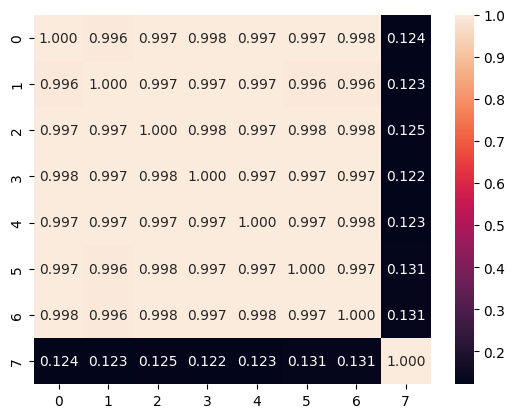

In [ ]:
corr_matrix=np.corrcoef(X.T) # Using numpy to calculate the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".3f")

In [ ]:
true_beta = np.array([5, 3, -2, 4, 1, 2, -3, 0])  # for 8 features
noise = np.random.randn(n_samples) * 0.5

y = X @ true_beta + noise

In [ ]:
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Mean of y:", np.mean(y))
print("Std of y:", np.std(y))

X shape: (100, 8)
y shape: (100,)
Mean of y: -1.052173959300952
Std of y: 9.35186102142574


In [ ]:
for i in range(8):
    corr = np.corrcoef(X[:, i], y)[0, 1]
    print(f"Corr(X{i+1}, y): {corr:.3f}")


Corr(X1, y): 0.997
Corr(X2, y): 0.997
Corr(X3, y): 0.996
Corr(X4, y): 0.998
Corr(X5, y): 0.997
Corr(X6, y): 0.996
Corr(X7, y): 0.995
Corr(X8, y): 0.109


In [ ]:
def train_test_split(X,y,train_size, n_samples):
  split=int(train_size*n_samples)
  X_train, X_test = X[:split], X[split:]
  y_train, y_test = y[:split], y[split:]
  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,0.8,n_samples)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 8), (20, 8), (80,), (20,))

In [ ]:
def Z_Scale(X_train, X_test):
  mu=np.mean(X_train, axis=0)
  std=np.std(X_train, axis=0)
  X_train_scaled=(X_train-mu)/std
  X_test_scaled=(X_test-mu)/std
  return X_train_scaled, X_test_scaled

In [ ]:
X_train_scaled, X_test_scaled=Z_Scale(X_train, X_test)

In [ ]:
#adding column of ones to handle bias
X_train_bias=np.column_stack((np.ones(X_train_scaled.shape[0]),X_train_scaled))
X_test_bias = np.column_stack((np.ones(X_test_scaled.shape[0]), X_test_scaled))

In [ ]:
def grad_descent(X_train_bias, y_train, alpha, n_iter, lamda):
    beta = np.zeros(X_train_bias.shape[1])
    m = X_train_bias.shape[0]
    cost = []

    for i in range(n_iter):
        y_pred = X_train_bias @ beta
        error = y_pred - y_train

        beta_reg = np.copy(beta)
        beta_reg[0] = 0  # do not regularize bias

        gradient = (X_train_bias.T @ error) / m + (lamda/m) * beta_reg
        beta = beta - alpha * gradient

        J = (1/(2*m)) * np.sum(error**2) + (lamda/(2*m)) * np.sum(beta_reg**2)
        cost.append(J)

        # if i % 100 == 0:
        #     print(f"Cost at iteration {i}: {J}")

    #plt.plot(cost)
    return beta, cost


Cost at iteration 0: 49.38476152574736
Cost at iteration 100: 0.3856900110282351
Cost at iteration 200: 0.2885669980771956
Cost at iteration 300: 0.27526444771281755
Cost at iteration 400: 0.2731929414097566
Cost at iteration 500: 0.2726341800417005
Cost at iteration 600: 0.27228641799606007
Cost at iteration 700: 0.2719750715932113
Cost at iteration 800: 0.27167651610564125
Cost at iteration 900: 0.27138735087634874


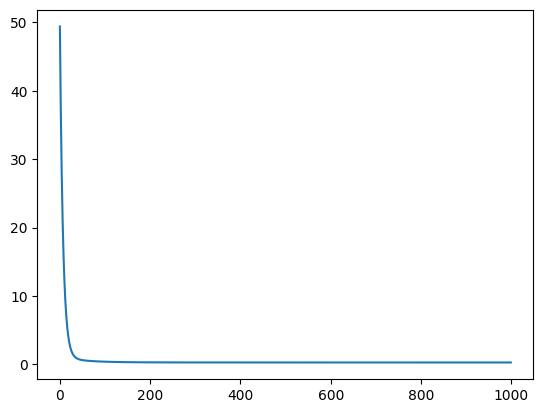

In [ ]:
grad_descent(X_train_bias, y_train, 0.01, 1000, 1)

In [ ]:
def R2(y, y_pred):
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    return 1 - ss_res/ss_tot


In [ ]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 10]
lambdas = [1e-15, 1e-10, 1e-5, 1e-3, 0, 1, 10, 20]

In [ ]:
best_r2 = -np.inf
best_params = None
best_cost = np.inf
n_iter=1000
for alpha in learning_rates:
    for lamda in lambdas:
        beta, cost_list = grad_descent(X_train_bias, y_train, alpha, n_iter, lamda)

        # predictions
        y_pred_train = X_train_bias @ beta
        y_pred_test = X_test_bias @ beta

        # cost and R2
        final_cost = cost_list[-1]
        r2_train = R2(y_train, y_pred_train)
        r2_test = R2(y_test, y_pred_test)

        # select best
        if r2_test > best_r2 and final_cost < best_cost:
            best_r2 = r2_test
            best_cost = final_cost
            best_params = (alpha, lamda)

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipython-input-3982717799.py:16: RuntimeWarning: overflow encountered in square
  J = (1/(2*m)) * np.sum(error**2) + (lamda/(2*m)) * np.sum(beta_reg**2)
/tmp/ipython-input-3982717799.py:13: RuntimeWarning: overflow encountered in matmul
  gradient = (X_train_bias.T @ error) / m + (lamda/m) * beta_reg
/tmp/ipython-input-3982717799.py:7: RuntimeWarning: invalid value encountered in matmul
  y_pred = X_train_bias @ beta
/tmp/ipython-input-3982717799.py:13: RuntimeWarning: invalid value encountered in matmul
  gradient = (X_train_bias.T @ error) / m + (lamda/m) * beta_reg
/tmp/ipython-input-3982717799.py:16: RuntimeWarning: invalid value encountered in scalar multiply
  J = (1/(2*m)) * np.sum(error**2) + (lamda/(2*m)) * np.sum(beta_reg**2)
/tmp/ipython-input-3982717799.py:13: RuntimeWarning: invalid value encoun

In [ ]:
print(f"Best parameters -> Learning rate: {best_params[0]}, Lambda: {best_params[1]}")
print(f"Minimum cost: {best_cost}, Max R2_score: {best_r2}")


Best parameters -> Learning rate: 0.1, Lambda: 0
Minimum cost: 0.15857085708089352, Max R2_score: 0.9955756446626505


Load the Hitters dataset from the following link
https://drive.google.com/file/d/1qzCKF6JKKMB0p7ul_lLy8tdmRk3vE_bG/view?usp=sharing   
(a)
Pre-process the data (null values, noise, categorical to numerical encoding)  
(b) Separate input and output features and perform scaling


(c)
Evaluate the performance of each trained model on test set. Which model
performs the best and Why?  

Fit a Linear, Ridge (use regularization parameter as 0.5748), and LASSO (use
regularization parameter as 0.5748) regression function on the dataset.  

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/Hitters.csv')
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [ ]:
df.shape

(322, 20)

PRE_PROCESSING

In [ ]:

# Remove rows where Salary (target) is missing
df = df.dropna(subset=["Salary"])

# Fill remaining nulls (if any)
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0])
    else:
        df[col].fillna(df[col].mean())

# Convert categorical columns to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

In [ ]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=0.5748),
    "Lasso Regression": Lasso(alpha=0.5748)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.185e+04, tolerance: 4.367e+03
  model = cd_fast.enet_coordinate_descent(


In [ ]:
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Mean Squared Error: {metrics['MSE']:.3f}")
    print(f"  R2 Score: {metrics['R2']:.3f}")
    print("-" * 40)

Linear Regression:
  Mean Squared Error: 128284.345
  R2 Score: 0.291
----------------------------------------
Ridge Regression:
  Mean Squared Error: 126603.903
  R2 Score: 0.300
----------------------------------------
Lasso Regression:
  Mean Squared Error: 126739.569
  R2 Score: 0.299
----------------------------------------


In [ ]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Linear": models["Linear Regression"].coef_,
    "Ridge": models["Ridge Regression"].coef_,
    "Lasso": models["Lasso Regression"].coef_
})
print("\nCoefficient Comparison:")
print(coef_df.head(10))


Coefficient Comparison:
  Feature      Linear       Ridge       Lasso
0   AtBat -212.692930 -209.712594 -219.897138
1    Hits  325.155262  301.978030  312.681230
2   HmRun   41.931298   28.084992   21.142183
3    Runs  -70.810146  -42.805828  -48.993582
4     RBI  -36.587948  -22.201747  -12.549530
5   Walks  116.936215  108.394830  107.841543
6   Years   38.092127   13.484544   14.607749
7  CAtBat -535.084513 -323.588405 -323.959079
8   CHits   72.265737  105.407718    9.514846
9  CHmRun  -40.676042   18.955289   -0.000000


Ridge Regression performed the best overall, achieving the lowest cost (MSE) and the highest R² score.

This is because the dataset contains highly correlated predictor variables (multicollinearity), and Ridge’s L2 regularization term stabilizes the coefficient estimates without eliminating variables.

Q3. Cross Validation for Ridge and Lasso Regression  
Explore Ridge Cross Validation (RidgeCV) and Lasso Cross Validation (LassoCV)
function of Python. Implement both on Boston House Prediction Dataset (load_boston
dataset from sklearn.datasets).

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
boston = fetch_openml(name='boston', version=1, as_frame=True)
X = boston.data
y = boston.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
ridge_alphas = [0.1, 0.3, 0.5, 1, 3, 5, 10]
ridge_cv = RidgeCV(alphas=ridge_alphas, store_cv_results=True)
ridge_cv.fit(X_train, y_train)

ridge_pred = ridge_cv.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

In [ ]:
lasso_cv = LassoCV(alphas=None, cv=5, max_iter=10000, random_state=42)
lasso_cv.fit(X_train, y_train)

lasso_pred = lasso_cv.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

In [ ]:
print("RidgeCV:")
print(f"  Best alpha: {ridge_cv.alpha_}")
print(f"  Test MSE: {ridge_mse:.4f}")
print(f"  Test R²: {ridge_r2:.4f}\n")

print("LassoCV:")
print(f"  Best alpha: {lasso_cv.alpha_}")
print(f"  Test MSE: {lasso_mse:.4f}")
print(f"  Test R²: {lasso_r2:.4f}")

RidgeCV:
  Best alpha: 5.0
  Test MSE: 24.3984
  Test R²: 0.6673

LassoCV:
  Best alpha: 0.006863892263379668
  Test MSE: 24.3183
  Test R²: 0.6684


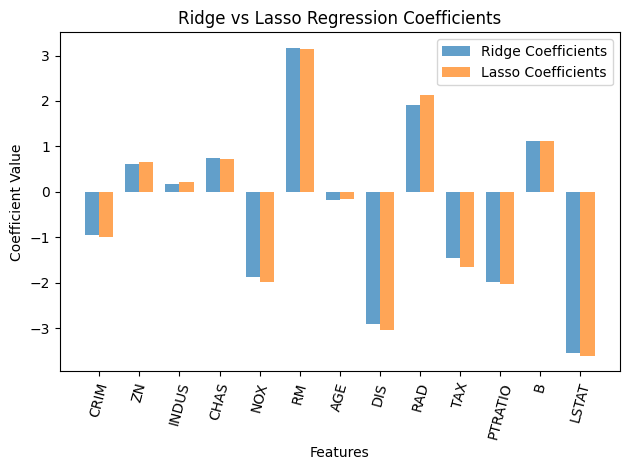

In [ ]:
# Get feature names
feature_names = X.columns

# Plot comparison
#plt.figure(figsize=(12,6))
width = 0.35
indices = np.arange(len(feature_names))

plt.bar(indices - width/2, ridge_cv.coef_, width=width, label='Ridge Coefficients', alpha=0.7)
plt.bar(indices + width/2, lasso_cv.coef_, width=width, label='Lasso Coefficients', alpha=0.7)

plt.xticks(indices, feature_names, rotation=75)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Ridge vs Lasso Regression Coefficients")
plt.legend()
plt.tight_layout()
plt.show()

Q4. Multiclass Logistic Regression: Implement Multiclass Logistic Regression (step-by step)
on Iris dataset using one vs. rest strategy?

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
classes = np.unique(y)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    return (-1/m) * (y @ np.log(h + epsilon) + (1 - y) @ np.log(1 - h + epsilon))


In [ ]:
def gradient_descent(X, y, lr=0.1, n_iter=1000):
    m, n = X.shape
    theta = np.zeros(n)
    for _ in range(n_iter):
        h = sigmoid(X @ theta)
        gradient = (1/m) * (X.T @ (h - y))
        theta -= lr * gradient
    return theta


In [ ]:
# Add bias column
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Train one classifier per class
thetas = []
for c in classes:
    y_binary = np.where(y_train == c, 1, 0)
    theta_c = gradient_descent(X_train_bias, y_binary, lr=0.1, n_iter=2000)
    thetas.append(theta_c)
thetas = np.array(thetas)


In [ ]:
def predict_multiclass(X, thetas):
    probs = sigmoid(X @ thetas.T)
    return np.argmax(probs, axis=1)

y_pred = predict_multiclass(X_test_bias, thetas)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
